In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def phase_portrait(func, xlim=[-10, 10], ylim=[-10, 10], selected_states=(0, 1),
                   fixed_states_vector=None, grid_density=20, t_span=[0, 20],
                    t_eval=None, x0=None):
    if len(selected_states) != 2:
        raise ValueError("selected_states must be a tuple of two indices.")
    if fixed_states_vector is None:
        raise ValueError("fixed_states_vector must be provided.")
    
    state1, state2 = selected_states
    n = len(fixed_states_vector)

    x1 = np.linspace(xlim[0], xlim[1], grid_density)
    x2 = np.linspace(ylim[0], ylim[1], grid_density)
    X1, X2 = np.meshgrid(x1, x2)

    U = np.zeros(X1.shape)
    V = np.zeros(X2.shape)

    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            x = fixed_states_vector.copy()
            x[state1] = X1[i, j]
            x[state2] = X2[i, j]

            dx = func(0, x)
            U[i, j] = dx[state1]
            V[i, j] = dx[state2]

    N = np.sqrt(U**2 + V**2)
    U /= N
    V /= N

    plt.figure(figsize=(10, 10))
    plt.streamplot(X1, X2, U, V, color='gray', density=1.0, linewidth=1, arrowsize=1)

    if x0 is None:
        x0 = np.zeros(n)
    if t_eval is None:
        t_eval = np.linspace(t_span[0], t_span[1], 100)

    sol = solve_ivp(func, t_span, x0, t_eval=t_eval, dense_output=True)
    plt.plot(sol.y[state1], sol.y[state2], lw=2)

    plt.xlabel(f'$x_{state1+1}$')
    plt.ylabel(f'$x_{state2+1}$')
    plt.title(f'Фазовый портрет в координатах $x_{state1+1}$ и $x_{state2+1}$')
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [4]:
def pendulum(t, x):
    """
    Нелинейный маятник без затухания.
    Состояния: x[0] = угол (θ), x[1] = угловая скорость (θ̇)
    """
    dx = np.zeros(2)
    dx[0] = x[1]
    dx[1] = -np.sin(x[0])
    return dx

In [7]:
def damped_pendulum(t, x):
    """
    Нелинейный маятник без затухания.
    Состояния: x[0] = угол (θ), x[1] = угловая скорость (θ̇)
    """
    dx = np.zeros(2)
    dx[0] = x[1]
    dx[1] = -np.sin(x[0]) - 0.5 * x[1]
    return dx

In [10]:
def offset_pendulum(t, x):
    """
    Нелинейный маятник без затухания.
    Состояния: x[0] = угол (θ), x[1] = угловая скорость (θ̇)
    """
    dx = np.zeros(2)
    dx[0] = x[1]
    dx[1] = -np.sin(x[0]) + 2 * np.sin(x[0])
    return dx

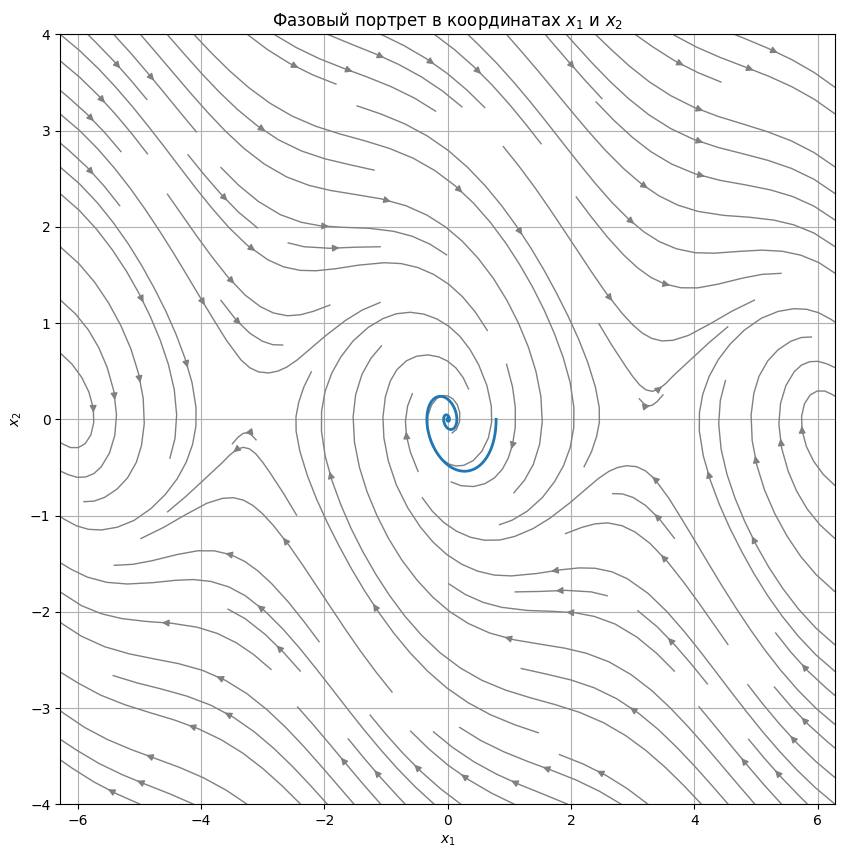

In [8]:
phase_portrait(
    func=damped_pendulum,
    xlim=(-2*np.pi, 2*np.pi),
    ylim=(-4, 4),
    selected_states=(0, 1),
    fixed_states_vector=[0, 0],
    x0=[np.pi/4, 0],
    t_span=[0, 20],
    t_eval=np.linspace(0, 20, 500)
)